In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import  LinearRegression, Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [53]:
df=pd.read_csv("../data/ObesityDataSet_raw_and_data_sinthetic.csv")

## **FEATURE ENGINEERING**

In [54]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


- FAVC : Feature, Binary, " Do you eat high caloric food frequently? "
- FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "
- NCP : Feature, Continuous, " How many main meals do you have daily? "
- CAEC : Feature, Categorical, " Do you eat any food between meals? "
- SMOKE : Feature, Binary, " Do you smoke? "
- CH2O: Feature, Continuous, " How much water do you drink daily? "
- SCC: Feature, Binary, " Do you monitor the calories you eat daily? "
- FAF: Feature, Continuous, " How often do you have physical activity? "
- TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "
- CALC : Feature, Categorical, " How often do you drink alcohol? "
- MTRANS : Feature, Categorical, " Which transportation do you usually use? "

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

Transformamos las variables object en numéricas

In [56]:
df["Male"] = df["Gender"].map({"Male": 1, "Female": 0})
df=df.drop(columns="Gender")

In [57]:
df["BMI"]=df["Weight"]/(df["Height"])**2

In [58]:
df["family_with_overweight"]=df["family_history_with_overweight"].map({"yes":1,"no":0})
df=df.drop(columns="family_history_with_overweight")

In [59]:
df["Alcohol"]=df["CALC"].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})
df=df.drop(columns="CALC")

In [60]:
#nos centramos en si se ejercita de alguna forma o depende de un medio de transporte
df["Andar_bici"]=df["MTRANS"].map({'Public_Transportation':0,'Automobile':0, 'Motorbike':0,'Walking':1,'Bike':1})
df=df.drop(columns="MTRANS")

In [61]:
#Nos vamos a centrar en si la persona pica o no entre horas, independientemente de la frecuencia, ya que no sabemos la cantidad que es lo realmente importante
df["Picoteo"]=df["CAEC"].map({'Sometimes':1, 'Frequently':1, 'Always':1, 'no':0})
df=df.drop(columns="CAEC")

In [62]:
df["Fumador"]=df["SMOKE"].map({'no':0,"yes":1})
df=df.drop(columns="SMOKE")

In [63]:
df["Control_kcal"]=df["SCC"].map({'no':0,"yes":1})
df=df.drop(columns="SCC")

In [64]:
df["FastFood"]=df["FAVC"].map({'no':0,"yes":1})
df=df.drop(columns="FAVC")

In [65]:
df["Age"]=df["Age"].astype(int)

## **ANÁLISIS** 

<Axes: >

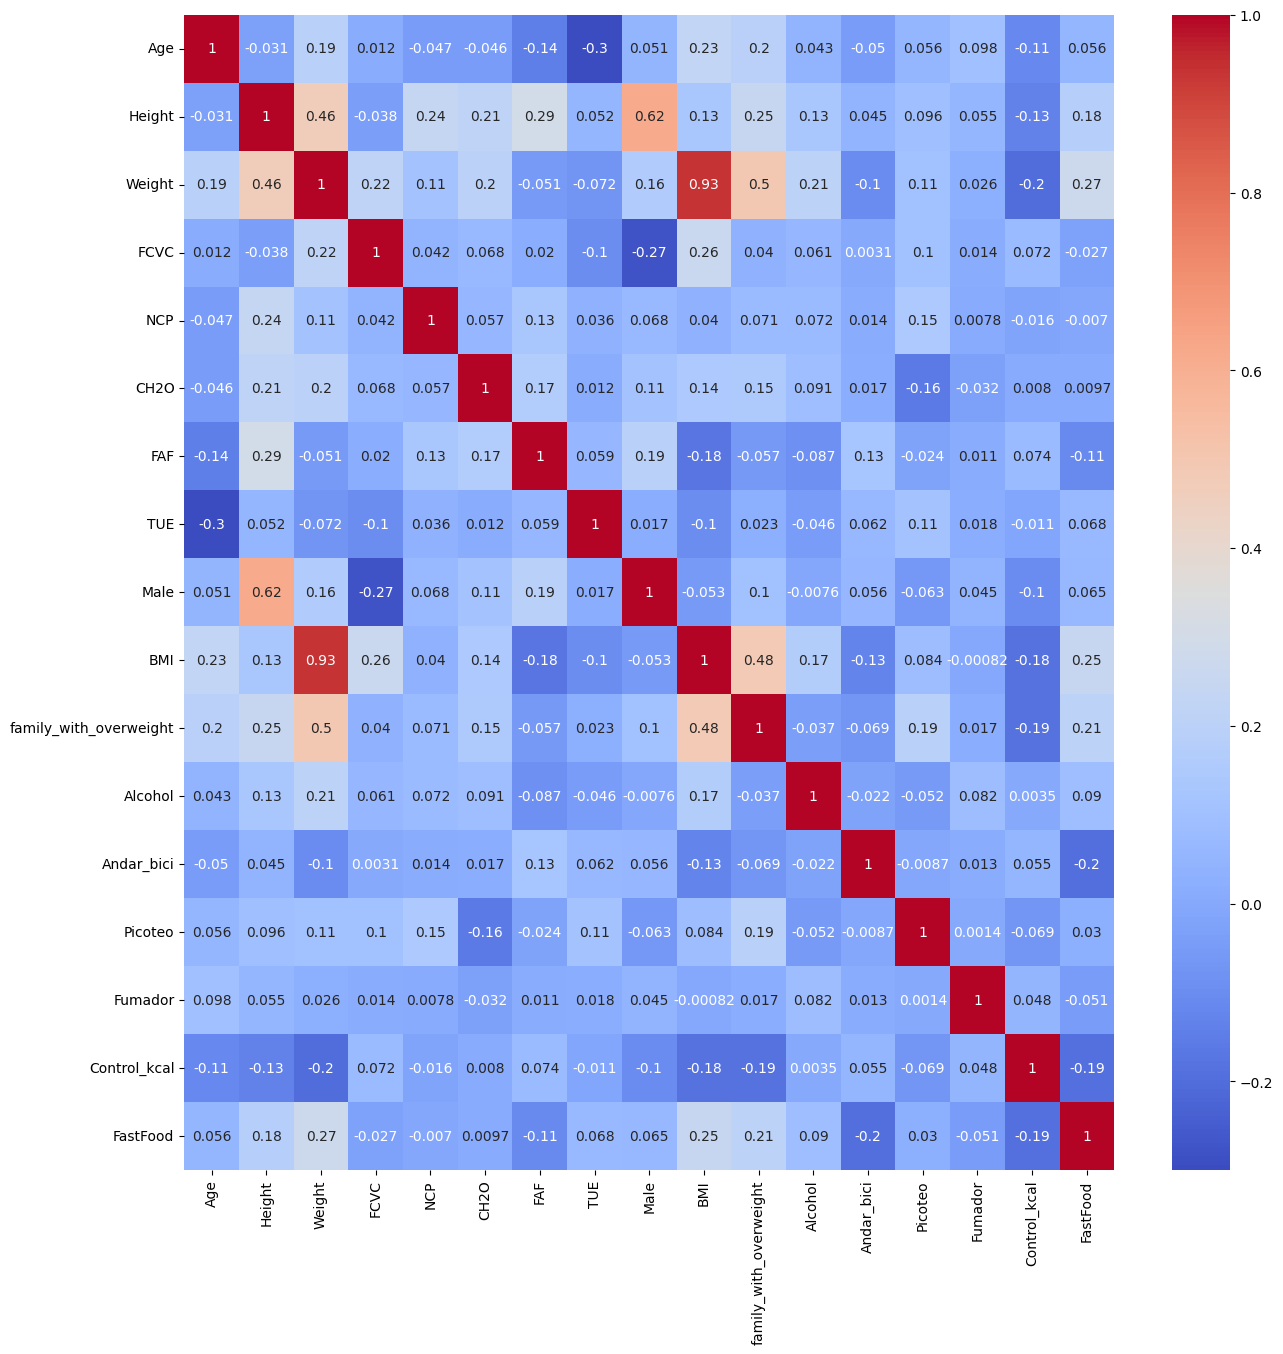

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap((df.drop(columns="NObeyesdad")).corr(),annot=True,cmap="coolwarm")

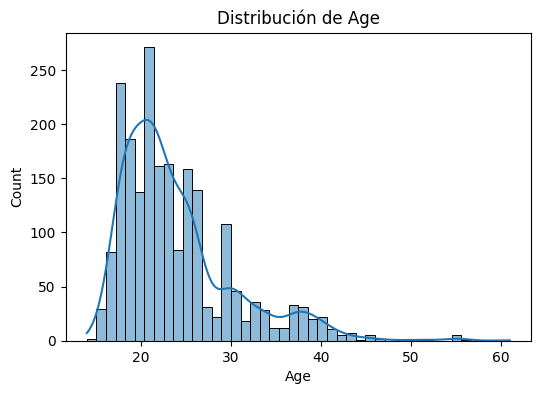

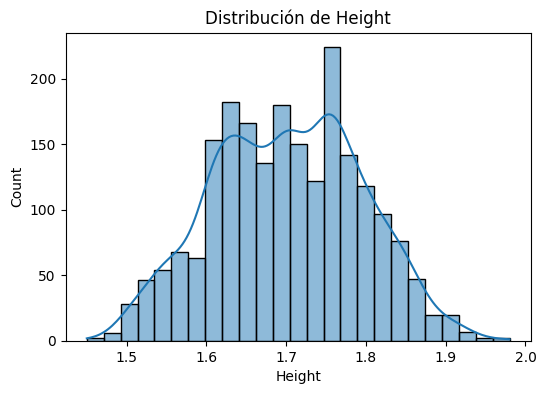

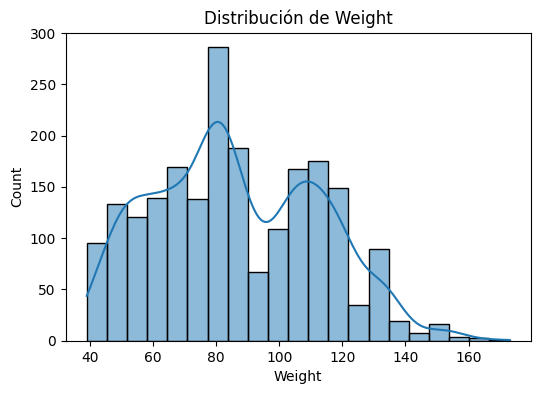

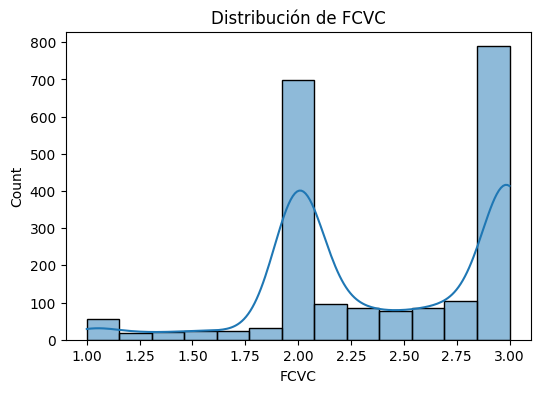

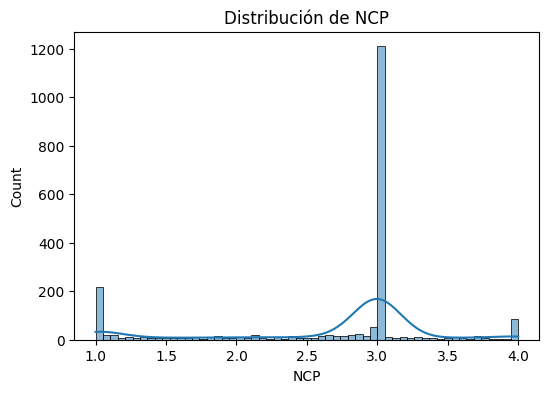

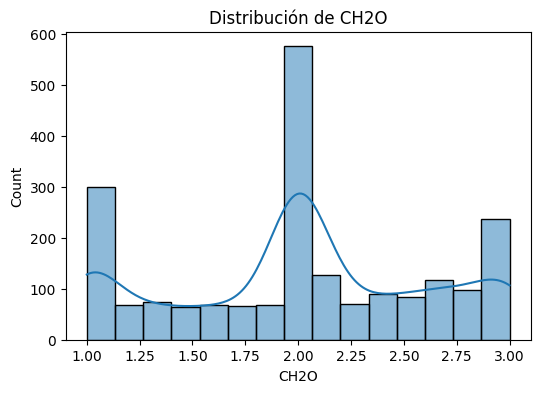

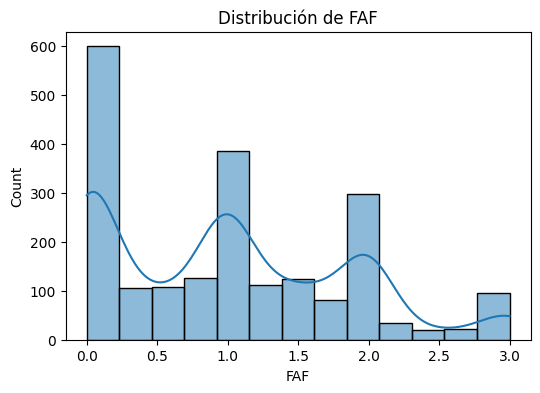

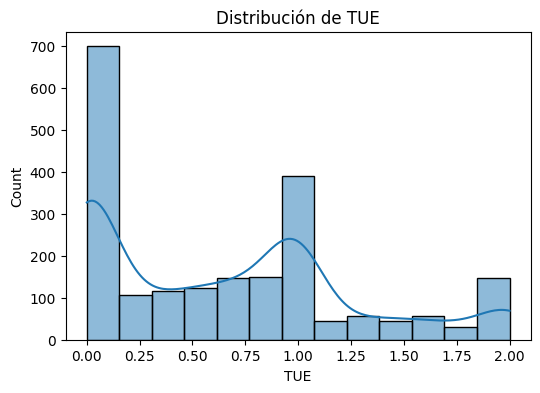

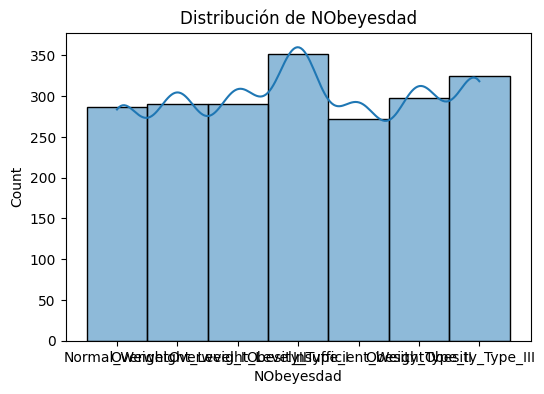

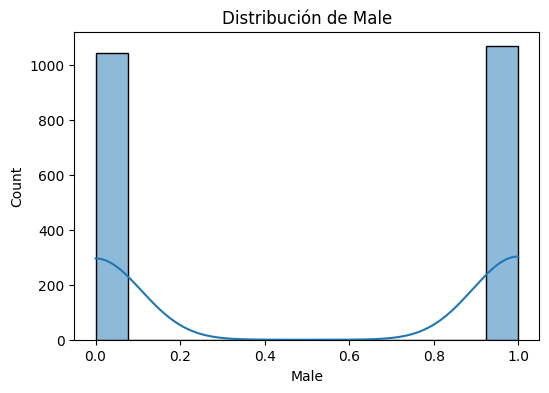

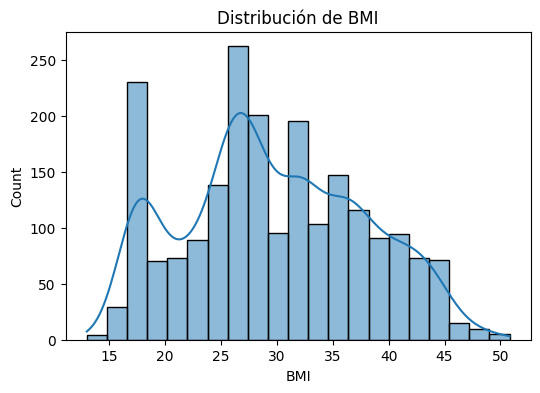

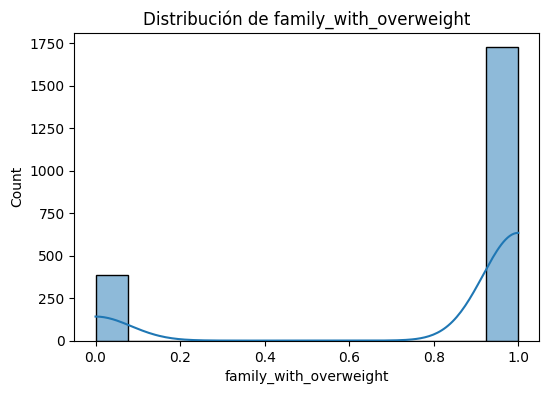

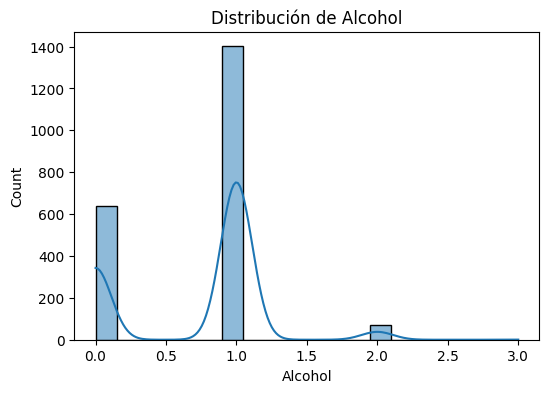

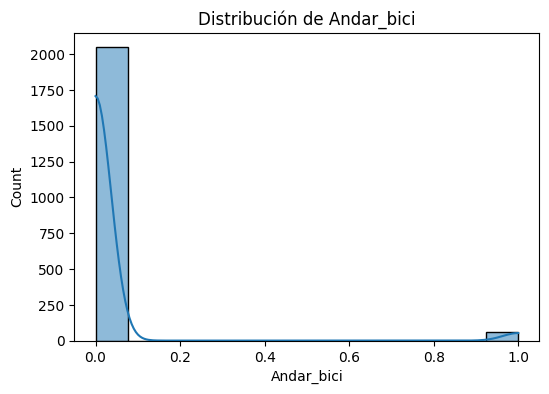

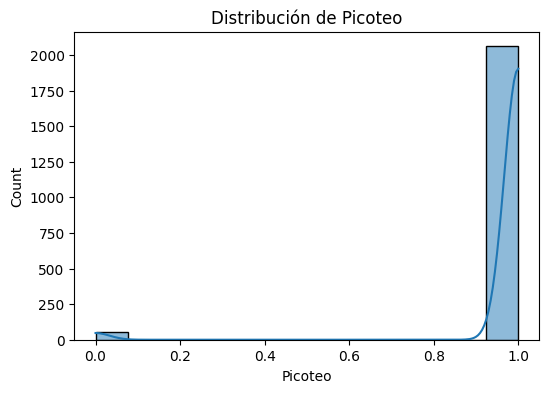

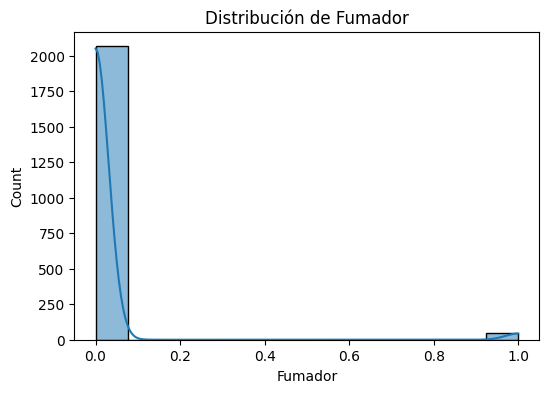

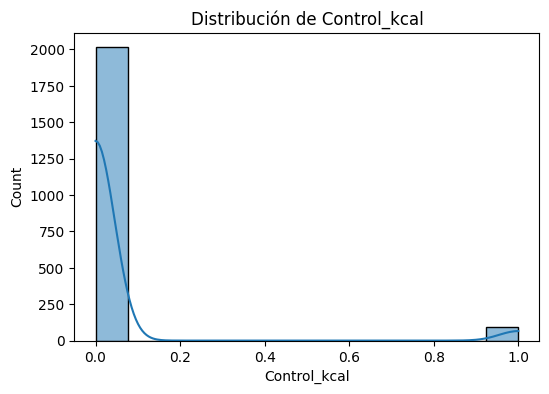

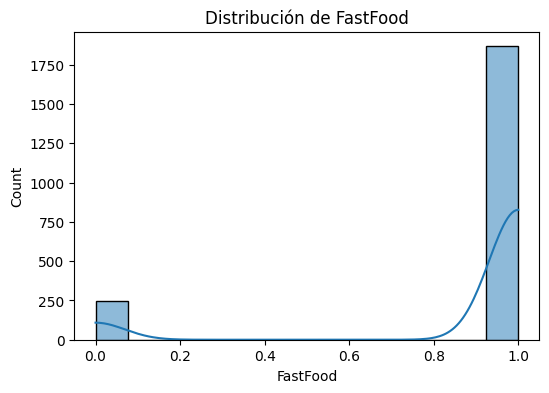

In [16]:
for col in df.columns:
    plt.figure(figsize=(6, 4)) 
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()

- Las edades se concentran entorno a los 15-30 años aunqu etenemos un rango de 10-60.
- Las alturas notenemos muchos datos alejados d elo que seria un rango medio(1.7 a 1.8)
- Los pesos son muy variados detacando los 80 kg
- El número de comidas diarias suele ser 3, lo que nos puede servir para futuras predicciones o recomendaciones
- Las categorias de peso está muy igualada
- EL numero de hombres y mujeres es similar, lo que es importante ya que por constitución los hombres sueles tender a pesar más al igual que el metabolismo o el porcentaje graso es muy diferente
- En la distribución de IBM tenemos un rango muy amplio aunque destaca el correspondiente a infrapeso y sobrepeso
- Hay más datos donde si que existen antecedentes famiales de obesidad
- En alcohol la mayoria de datos son de una frecuencia de a veces
- La mayoría se despaza en algún transporte para ir al trabajo o a la escuela
- La mayoria de los registros indican que no son fumadores y que si picotean durante el dia, así como que no contolan las kcal ingeridas y si consumen comida rápida.
Estas distribuciones ya nos dan un indicio de los datos que pueden sernos más relevantes

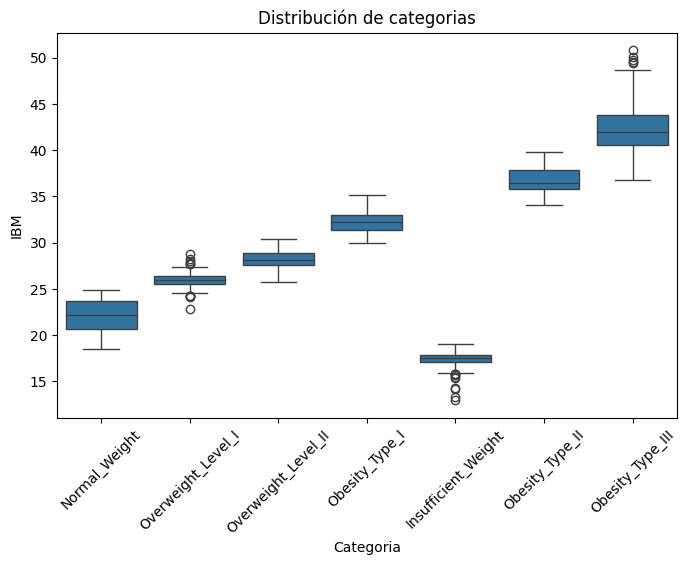

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="NObeyesdad", y="BMI")
plt.title("Distribución de categorias")
plt.xlabel("Categoria")
plt.ylabel("IBM")
plt.xticks(rotation=45)
plt.show()

Para la clasificación se tiene un 5% de rango en el IBM. Esos outlier pueden deberse a casos que estén con un porcetaje en la frontera y no tan central

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level_I'),
  Text(2, 0, 'Overweight_Level_II'),
  Text(3, 0, 'Obesity_Type_I'),
  Text(4, 0, 'Insufficient_Weight'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

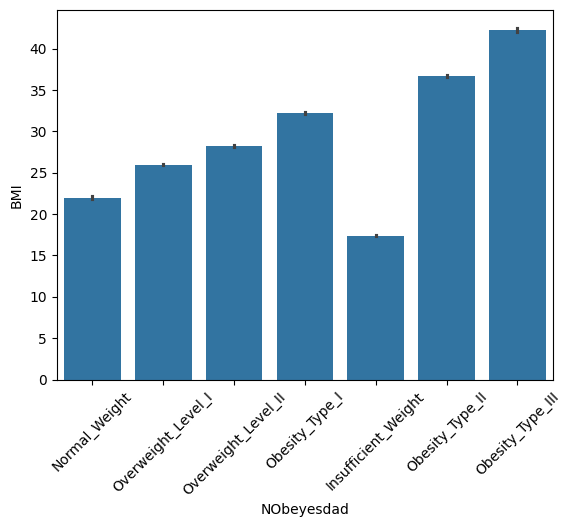

In [18]:
sns.barplot(x=df["NObeyesdad"],y=df["BMI"])

plt.xticks(rotation=45)

## **MODELOS**

In [19]:
X=df[['Age', 'Height', 'Weight', 'family_with_overweight', 'Alcohol','Andar_bici','Control_kcal', 'FastFood',"Male"]]
y= df["BMI"]
#Para poder hacer la clasificación debemos tomar como target el BMI ya que es el rango
# que usamos para categorizar. De esta forma podremos predecir de un modo mucho mas preciso

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R2 score", model.score(X_test, y_test))
    print("R2 score train", model.score(X_train, y_train))
    print("MAE", mean_absolute_error(y_test, y_pred))
    print("MSE", mean_squared_error(y_test, y_pred))
    print("RMSE", mean_squared_error(y_test, y_pred) ** (1/2))
    sns.displot(y_pred - y_test)
    return model

In [22]:
scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

R2 score 0.9902139135403227
R2 score train 0.9905006739520524
MAE 0.5975386158017337
MSE 0.6464312554406806
RMSE 0.8040094871583796


LinearRegression()

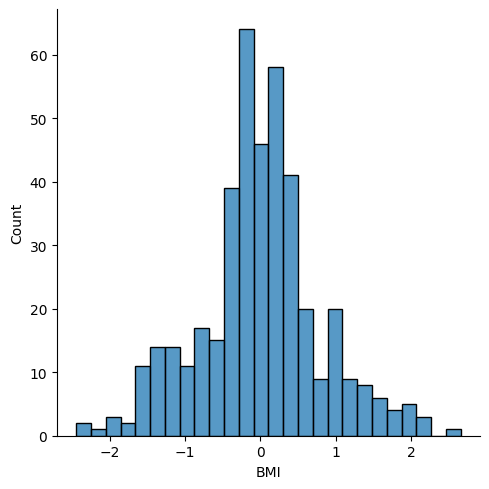

In [23]:
model_1 = train_evaluate_model(LinearRegression(), X_train_scal, y_train, X_test_scal, y_test)
model_1

R2 score 0.9902139135403228
R2 score train 0.9905006739520524
MAE 0.5975386158017404
MSE 0.6464312554406774
RMSE 0.8040094871583776


LinearRegression()

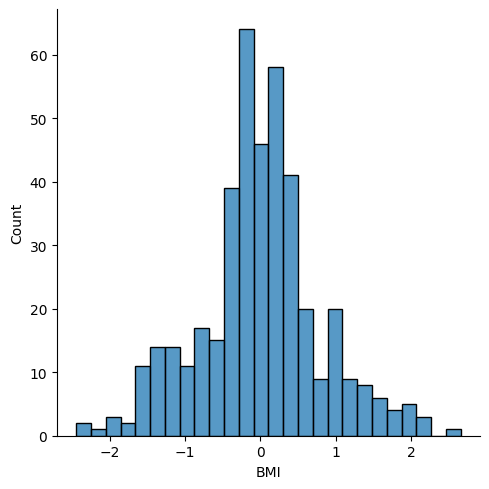

In [24]:
model_2 = train_evaluate_model(LinearRegression(), X_train, y_train, X_test, y_test)
model_2

R2 score 0.986761941247038
R2 score train 0.9868778270722159
MAE 0.7203350516969992
MSE 0.8744552763288164
RMSE 0.9351231343137739


Ridge(alpha=2)

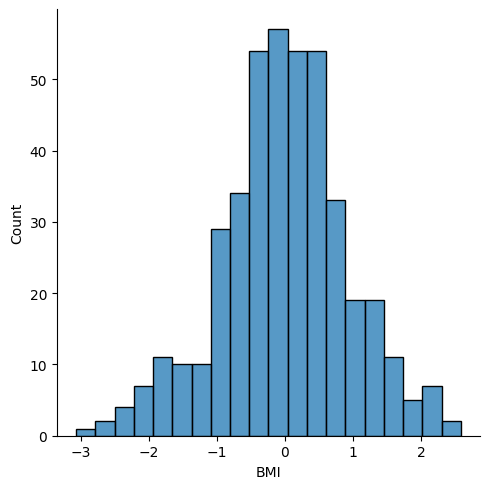

In [25]:
model_3 = train_evaluate_model(Ridge(alpha=2), X_train, y_train, X_test, y_test)
model_3

R2 score 0.9999344818561171
R2 score train 0.999934287134717
MAE 0.047236292542223154
MSE 0.004327876744077243
RMSE 0.06578660003433255


LinearRegression()

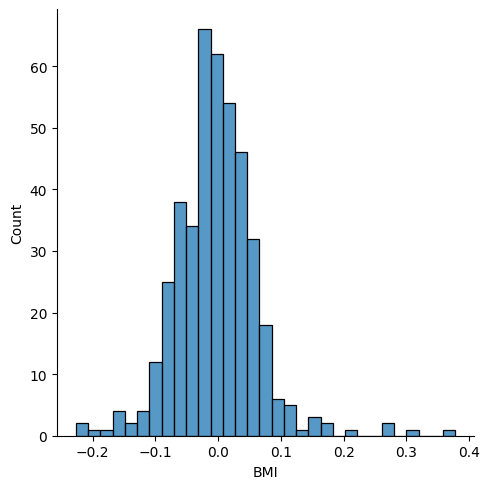

In [26]:
pol_2 = PolynomialFeatures(degree=2)

X_train_pol2 = pol_2.fit_transform(X_train)
X_test_pol2 = pol_2.transform(X_test)

model_4 = train_evaluate_model(LinearRegression(), X_train_pol2, y_train, X_test_pol2, y_test)
model_4

In [27]:
# Guardar el transformador PolynomialFeatures
with open("../modelos/pol2_transform_ob.pkl", "wb") as pol_transf_ob:
    pickle.dump(pol_2, pol_transf_ob)

In [28]:
with open("../modelos/pol2_ob.pkl", "wb") as model_pol2_ob:
    pickle.dump(model_4, model_pol2_ob)

R2 score 0.9934526712797164
R2 score train 0.9838528483612364
MAE 0.5052888649728896
MSE 0.4324913684213821
RMSE 0.6576407593978509


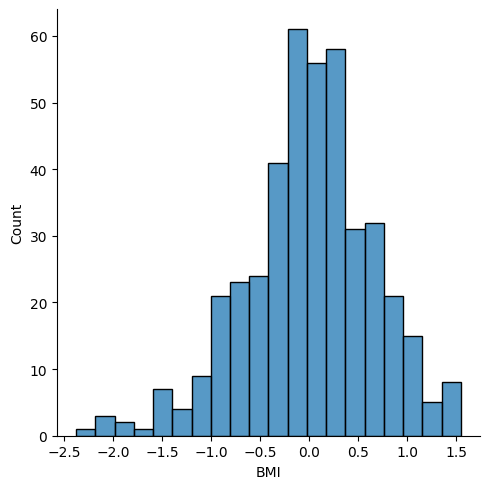

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rnd_reg = RandomForestRegressor(n_estimators=200,
                                 max_leaf_nodes=32,
                                 random_state=42)
rnd_reg.fit(X_test, y_test)

y_pred_reg = rnd_reg.predict(X_test)
print("R2 score", rnd_reg.score(X_test, y_test))
print("R2 score train",rnd_reg.score(X_train, y_train))
print("MAE", mean_absolute_error(y_test, y_pred_reg))
print("MSE", mean_squared_error(y_test, y_pred_reg))
print("RMSE", mean_squared_error(y_test, y_pred_reg) ** (1/2))
sns.displot(y_pred_reg - y_test)

In [30]:
with open("../modelos/rnd_ob.pkl", "wb") as model_rnd_ob:
    pickle.dump(rnd_reg, model_rnd_ob)

Tenemos que tener en cuenta que el rengo entre una categoria y otra es de un 5%, por tanto el que parece mejor modelo es el polinomico, que nos da un Mae de 0.047%

### **MODELO REDES NEURONALES**

In [31]:
from tensorflow.keras.optimizers import RMSprop
from keras.utils import get_file
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [32]:
model_rn = keras.models.Sequential([
    keras.layers.Dense(64, activation = 'relu',
                      input_shape = X_train_scal.shape[1:]),# se esta definiendo la primera capa oculta(se autodefine),
                       # ya que no tiene funcion de activacion
    keras.layers.Dense(16),
    keras.layers.Dense(1)
])

model_rn.compile(loss = "mse",#funcion de perdida
             optimizer=tf.keras.optimizers.RMSprop(0.001),
             metrics=['mae'])



c:\Users\UX490U\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model_rn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,697 (6.63 KB)

 Trainable params: 1,697 (6.63 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
early_stopping = keras.callbacks.EarlyStopping(patience=5)

In [35]:
history = model_rn.fit(X_train_scal,
                   y_train,
                   batch_size=32,
                   epochs = 100,
                   validation_split=0.2,
                   callbacks=[early_stopping])# como ya hemos sacado el validation se lo pasamos

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 850.5301 - mae: 27.8509 - val_loss: 719.6234 - val_mae: 25.1253
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 583.2257 - mae: 22.2153 - val_loss: 405.8262 - val_mae: 17.9453
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 301.7266 - mae: 14.9662 - val_loss: 132.8109 - val_mae: 9.7370
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 85.0306 - mae: 7.7245 - val_loss: 34.7936 - val_mae: 4.9205
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 28.7879 - mae: 4.4813 - val_loss: 18.7001 - val_mae: 3.3657
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 18.0919 - mae: 3.3590 - val_loss: 11.3544 - val_mae: 2.6182
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.1941 - mae: 2.4474 - val_loss: 7.7383 - val_mae: 2.0909
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.0346 - mae: 2.0087 - val_loss: 5.9622 - val_mae: 1.7886
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━

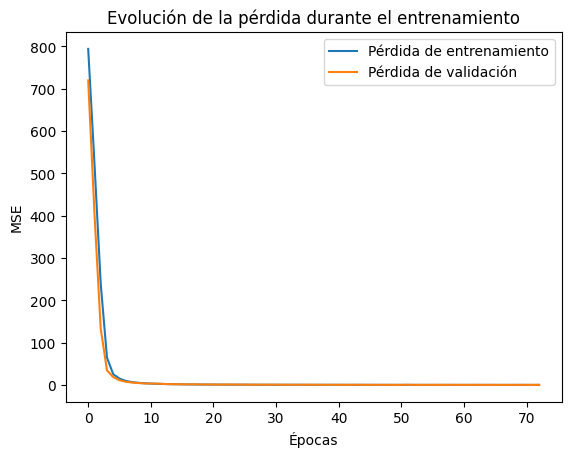

In [36]:
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.show()

In [37]:
y_pred=model_rn.predict(X_test_scal[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


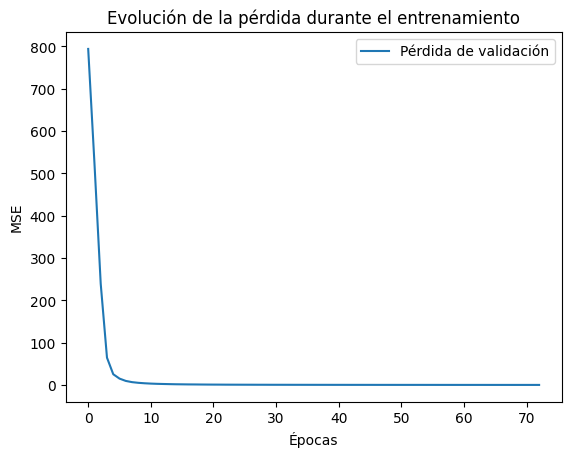

In [38]:
plt.plot(history.history['loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.show()

In [39]:
model_rn.compile(loss="mse", optimizer=RMSprop(learning_rate=0.001), metrics=["mae", "mse"])

loss,mae, mse = model_rn.evaluate(X_test_scal, y_test, verbose=1)

print(f"Pérdida (Loss - MSE): {loss:.4f}")
print(f"Error absoluto medio (MAE): {mae:.4f}")
print(f"Error cuadrático medio (MSE): {mse:.4f}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.4445 - mae: 0.5221 - mse: 0.4445 
Pérdida (Loss - MSE): 0.4664
Error absoluto medio (MAE): 0.5337
Error cuadrático medio (MSE): 0.4664


In [40]:
model_rn.save("../modelos/model_keras_ob.h5")

---------------------------

Evaluamos los modelos

In [41]:
y_pred_rn = (model_rn.predict(X_test_scal)).flatten()#Lo pasamos a 1_dim


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [42]:
df_resultados_rn = pd.DataFrame({'Age':X_test["Age"], 'Height (m)':X_test['Height'],'Male':X_test['Male'],'Weight (kg)':X_test['Weight'],"BMI": y_pred_rn,"BMI real":y_test})

In [43]:
df_resultados_rn.head(10)

,Age,Height (m),Male,Weight (kg),BMI,BMI real
544,20,1.755978,0,53.699561,17.492695,17.415366
1987,26,1.624950,0,111.004920,41.673573,42.039953
420,18,1.850000,1,60.000000,17.817738,17.531045
527,21,1.520000,0,42.000000,18.768051,18.178670
196,22,1.750000,1,74.000000,25.071611,24.163265
744,18,1.738702,1,50.248677,16.840052,16.621657
1635,26,1.819535,1,118.332689,35.026817,35.742416
324,30,1.650000,0,71.000000,25.805920,26.078972
1449,23,1.571812,0,78.997166,32.132328,31.974982
634,23,1.710129,0,50.079991,17.314245,17.124050


In [44]:
X_ejer_pol2 = pol_2.transform(X_test)
y_pred_ejer_pol2 = np.round(model_4.predict(X_ejer_pol2),2)

In [45]:
df_resultados_pol2 = pd.DataFrame({"BMI": y_pred_ejer_pol2,"BMI real":y_test})

In [46]:
df_resultados_pol2.head(10)

,BMI,BMI real
544,17.38,17.415366
1987,41.97,42.039953
420,17.63,17.531045
527,18.36,18.178670
196,24.15,24.163265
744,16.53,16.621657
1635,35.74,35.742416
324,26.08,26.078972
1449,31.92,31.974982
634,17.05,17.124050


In [47]:
df_resultados_rnd = pd.DataFrame({"BMI": y_pred_reg,"BMI real":y_test})

In [48]:
df_resultados_rnd.head(10)

,BMI,BMI real
544,17.694337,17.415366
1987,41.702516,42.039953
420,18.139699,17.531045
527,18.079755,18.178670
196,24.264697,24.163265
744,17.262520,16.621657
1635,35.981543,35.742416
324,26.201512,26.078972
1449,32.099898,31.974982
634,17.411444,17.124050


**Evaluamos que modelo de los escogidos nos da mejores resultados en test**

In [ ]:
from sklearn.metrics import r2_score
mae = mean_absolute_error(df_resultados_rn["BMI real"], df_resultados_rn["BMI"])
mse = mean_squared_error(df_resultados_rn["BMI real"], df_resultados_rn["BMI"])
rmse = np.sqrt(mse)
r2 = r2_score(df_resultados_rn["BMI real"],df_resultados_rn["BMI"])

# Mostrar resultados
print(f"MAE_rnd: {mae:.2f} ")
print(f"RMSE_rnd: {rmse:.2f}")
print(f"R² Score_rnd: {r2:.2f}")

MAE_rnd: 0.53 kcal
RMSE_rnd: 0.68 kcal
R² Score_rnd: 0.99


In [ ]:
mae = mean_absolute_error(df_resultados_pol2["BMI real"], df_resultados_pol2["BMI"])
mse = mean_squared_error(df_resultados_pol2["BMI real"], df_resultados_pol2["BMI"])
rmse = np.sqrt(mse)
r2 = r2_score(df_resultados_pol2["BMI real"],df_resultados_pol2["BMI"])

# Mostrar resultados
print(f"MAE_pol2: {mae:.2f} ")
print(f"RMSE_pol2: {rmse:.2f} ")
print(f"R² Score_pol2: {r2:.2f}")

MAE_pol2: 0.05 kcal
RMSE_pol2: 0.07 kcal
R² Score_pol2: 1.00


In [ ]:
mae = mean_absolute_error(df_resultados_rnd["BMI real"], df_resultados_rnd["BMI"])
mse = mean_squared_error(df_resultados_rnd["BMI real"], df_resultados_rnd["BMI"])
rmse = np.sqrt(mse)
r2 = r2_score(df_resultados_rnd["BMI real"],df_resultados_rnd["BMI"])

# Mostrar resultados
print(f"MAE_rnd: {mae:.2f} ")
print(f"RMSE_rnd: {rmse:.2f} ")
print(f"R² Score_rnd: {r2:.2f}")

MAE_rnd: 0.51 kcal
RMSE_rnd: 0.66 kcal
R² Score_rnd: 0.99


    De todos los modelos estudiados vemos que el que mejor resultados nos da es el de polinomio de grado 2

--------------------------------

----------------------------------